[View in Colaboratory](https://colab.research.google.com/github/ankitbit/Deep_Learning/blob/master/Knots_Identification.ipynb)

In [359]:
! cd knots
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/knots.zip
! unzip knots.zip
! rm knots.zip

--2018-10-15 23:10:35--  http://www.ee.oulu.fi/research/imag/knots/KNOTS/knots.zip
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8505865 (8.1M) [application/zip]
Saving to: ‘knots.zip’

knots.zip           100%[===================>]   8.11M  3.98MB/s    in 2.0s    

2018-10-15 23:10:37 (3.98 MB/s) - ‘knots.zip’ saved [8505865/8505865]

Archive:  knots.zip
replace knot0001.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: knot0001.ppm            
  inflating: knot0002.ppm            
  inflating: knot0003.ppm            
  inflating: knot0004.ppm            
  inflating: knot0005.ppm            
  inflating: knot0006.ppm            
  inflating: knot0007.ppm            
  inflating: knot0008.ppm            
  inflating: knot0009.ppm            
  inflating: knot0010.ppm            
  inflating: knot0011.ppm        

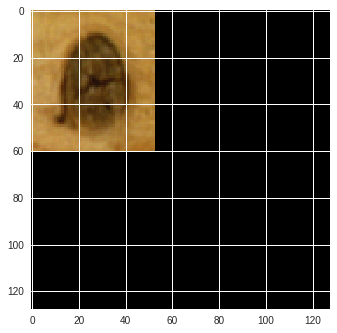

In [377]:
# Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_to_ppm_file ='/content/knot0055.ppm'
img = imread(path_to_ppm_file)
img.shape
plt.imshow(imread(path_to_ppm_file))

In [248]:
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/names.txt
! wget http://www.ee.oulu.fi/research/imag/knots/KNOTS/ppm.txt
! mkdir ppm
! mkdir names
! mv ppm.txt /content/ppm/
! mv names.txt /content/names/

--2018-10-15 22:01:45--  http://www.ee.oulu.fi/research/imag/knots/KNOTS/names.txt
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11189 (11K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>]  10.93K  --.-KB/s    in 0s      

2018-10-15 22:01:45 (218 MB/s) - ‘names.txt’ saved [11189/11189]

--2018-10-15 22:01:47--  http://www.ee.oulu.fi/research/imag/knots/KNOTS/ppm.txt
Resolving www.ee.oulu.fi (www.ee.oulu.fi)... 130.231.61.28, 2001:708:520:80::28
Connecting to www.ee.oulu.fi (www.ee.oulu.fi)|130.231.61.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3513 (3.4K) [text/plain]
Saving to: ‘ppm.txt’

ppm.txt             100%[===================>]   3.43K  --.-KB/s    in 0s      

2018-10-15 22:01:47 (116 MB/s) - ‘ppm.txt’ saved [3513/3513]

mkdir: cannot create dir

In [0]:
# libraries relevant for data importing, processing

from scipy.misc import imread
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from resizeimage import resizeimage

In [0]:

    
# reading files from the main directory
imgs = []
path = '/content'
for filename in os.listdir(path):
  if filename not in ['sample_data', '.config', 'names', 'ppm',
                      'knots.zip.1', 'knots.zip','knots']:
    
    
    # converting all the images to (length = 32, breadth = 32) size
    with open(filename, 'r+b') as f:
      with Image.open(f) as image:
        old_size = image.size
        new_size = (128, 128)
        new_image = Image.new("RGB", new_size)   ## luckily, this is already black!
        new_image.paste(image)
        new_image.save(filename, image.format)

      img = imread(filename)
      imgs.append(img)
imgs = np.array(imgs)

In [378]:
img.shape

(128, 128, 3)

In [0]:
imgs = imgs/255

In [0]:
X_train, X_test = train_test_split(imgs, test_size=0.2, random_state=42)

In [382]:
import pandas as pd
data = pd.read_csv('/content/names/names.txt', sep=" ", header=None)
Y = data[1]
Y= np.array(Y)
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(Y)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=42)
print(Y_train.shape)
print(Y_test.shape)

(350, 7)
(88, 7)


In [0]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
encoder = LabelBinarizer()
Y = to_categorical(Y, num_classes=None)


In [383]:
print(X_train[2][:1], Y_train[2])

[[[0.95294118 0.79215686 0.60784314]
  [0.9372549  0.77647059 0.56862745]
  [0.91372549 0.76078431 0.54117647]
  [0.9254902  0.74901961 0.56470588]
  [0.92941176 0.74901961 0.52941176]
  [0.92156863 0.71764706 0.52156863]
  [0.89803922 0.70980392 0.52941176]
  [0.91372549 0.72941176 0.51764706]
  [0.92941176 0.74117647 0.51372549]
  [0.9254902  0.74117647 0.52941176]
  [0.94117647 0.76078431 0.56862745]
  [0.94901961 0.78431373 0.58431373]
  [0.94117647 0.78431373 0.59215686]
  [0.94117647 0.8        0.6       ]
  [0.94117647 0.81176471 0.61960784]
  [0.94117647 0.77647059 0.61176471]
  [0.9254902  0.78431373 0.63137255]
  [0.92941176 0.79215686 0.62745098]
  [0.91764706 0.74117647 0.56862745]
  [0.89803922 0.74117647 0.54509804]
  [0.90196078 0.76078431 0.58823529]
  [0.90588235 0.76078431 0.58823529]
  [0.9254902  0.8        0.59607843]
  [0.93333333 0.78039216 0.59215686]
  [0.90196078 0.74901961 0.56078431]
  [0.89803922 0.76078431 0.54901961]
  [0.90196078 0.7254902  0.52941176]
 

In [0]:
num_classes = Y_test.shape[1]

In [0]:
# Convolutional Neural Network Based Model for Identifying Faulty Wood Planks
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, Conv3D, Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras import backend as K
K.set_image_dim_ordering('th')

In [387]:

# Create the model
model = Sequential()
model.add(Conv2D(256, (4, 4),input_shape=(128, 128, 3), padding='same', 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (4, 4),input_shape=(32, 32, 3), padding='same', 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (4, 4), activation='relu', padding='same', 
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (4, 4),input_shape=(32, 32, 3), padding='same', 
                 activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (4, 4), activation='relu', padding='same', 
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
epochs = 100
lrate = 0.01
decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
sgd = SGD()
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 256, 128, 3)       524544    
_________________________________________________________________
dropout_102 (Dropout)        (None, 256, 128, 3)       0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 256, 128, 3)       1048832   
_________________________________________________________________
dropout_103 (Dropout)        (None, 256, 128, 3)       0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 128, 128, 3)       524416    
_________________________________________________________________
dropout_104 (Dropout)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 128, 128, 3)       262272    
__________

In [398]:
Y_train[1]

array([0, 0, 0, 0, 0, 0, 1])

In [400]:
# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=epochs, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 2s 7ms/step - loss: 1.6390 - acc: 0.4000 - val_loss: 1.6567 - val_acc: 0.4143
Epoch 2/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6361 - acc: 0.4000 - val_loss: 1.6686 - val_acc: 0.4143
Epoch 3/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6451 - acc: 0.4000 - val_loss: 1.6537 - val_acc: 0.4143
Epoch 4/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6500 - acc: 0.4000 - val_loss: 1.6560 - val_acc: 0.4143
Epoch 5/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6322 - acc: 0.4000 - val_loss: 1.6640 - val_acc: 0.4143
Epoch 6/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6381 - acc: 0.4000 - val_loss: 1.6528 - val_acc: 0.4143
Epoch 7/100
280/280 [==============================] - 1s 4ms/step - loss: 1.6408 - acc: 0.4000 - val_loss: 1.6557 - val_acc: 0.4143
Epoch 8/100
280/280 [===

Text(0.5,1,'Accuracy')

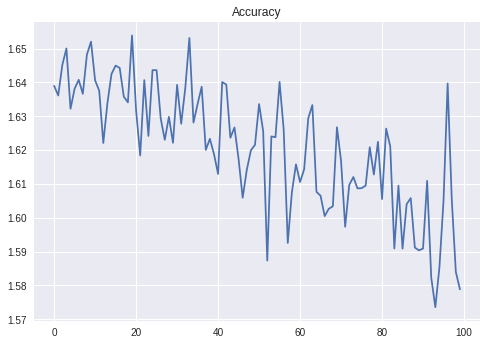

In [405]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Accuracy')

In [399]:
scores

[1.667691176587885, 0.43181817910887976]

In [0]:
from sklearn.metrics import classification_report

In [392]:
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
#Compute probabilities
Y_pred = model.predict(X_test)
#Assign most probable label
y_pred = np.argmax(Y_pred, axis=1)
#Plot statistics
print ('Analysis of results')

print(classification_report(np.argmax(Y_test,axis=1), y_pred))
print('Confusion Matrix\n',confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

Analysis of results
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.00      0.00      0.00        17
          2       0.00      0.00      0.00         9
          3       0.00      0.00      0.00         9
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         9
          6       0.43      1.00      0.60        38

avg / total       0.19      0.43      0.26        88

Confusion Matrix
 [[ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  9]
 [ 0  0  0  0  0  0  9]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  9]
 [ 0  0  0  0  0  0 38]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
